## **<center>  Logistic Regression (Binary Classification)</center>**

THEORY
<br>Logistic Regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/content/HR_comma_sep.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [12]:
left = df[df.left==1]
continued = df[df.left==0]

In [22]:
print("Size of DF: ",left.shape)
left.head()

Size of DF:  (3571, 10)


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [21]:
print("Size of DF: ",continued.shape)
continued.head()

Size of DF:  (11428, 10)


satisfaction_level  last_evaluation  number_project  \
2000                0.58             0.74               4   
2001                0.82             0.67               2   
2002                0.45             0.69               5   
2003                0.78             0.82               5   
2004                0.49             0.60               3   

      average_montly_hours  time_spend_company  Work_accident  left  \
2000                   215                   3              0     0   
2001                   202                   3              0     0   
2002                   193                   3              0     0   
2003                   247                   3              0     0   
2004                   214                   2              0     0   

      promotion_last_5years Department salary  
2000                      0      sales    low  
2001                      0      sales    low  
2002                      0      sales    low  
2003                      0      sales    low  
2004                      0      sales    low

In [23]:
left.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


satisfaction_level         0.440098
last_evaluation            0.718113
number_project             3.855503
average_montly_hours     207.419210
time_spend_company         3.876505
Work_accident              0.047326
left                       1.000000
promotion_last_5years      0.005321
dtype: float64

In [24]:
continued.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


satisfaction_level         0.666810
last_evaluation            0.715473
number_project             3.786664
average_montly_hours     199.060203
time_spend_company         3.380032
Work_accident              0.175009
left                       0.000000
promotion_last_5years      0.026251
dtype: float64

-> satisfaction_level mean is high for people who continued <br>
-> average_montly_hours mean is low for people who continued <br>
-> promotion_last_5years <br>
-> Work_accident 

**QUES.** **Plot bar charts showing impact of employee salaries on retention**

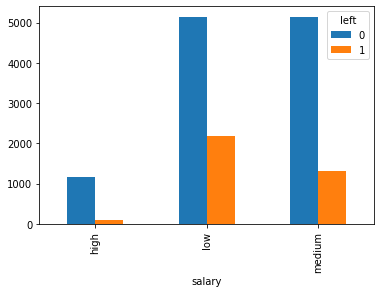

In [26]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

-> high salary people are more likely to continue the job.

**Q3. Plot bar charts showing corelation between department and employee retention**

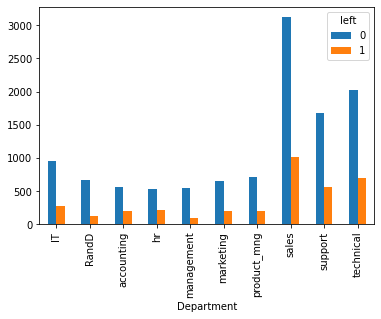

In [27]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

**Q3. Now build logistic regression model using variables that were narrowed down in step 1**

**These variables will be used for model building:**<br>
Satisfaction Level, 
Average Monthly Hours, 
Promotion Last 5 Years, Work_accident, and
Salary


In [47]:
newDF = df[['satisfaction_level','average_montly_hours','promotion_last_5years', 'Work_accident', 'salary']]
newDF.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   Work_accident  salary  
0              0     low  
1              0  medium  
2              0  medium  
3              0     low  
4              0     low

In [48]:
salaryDummies= pd.get_dummies(newDF.salary, prefix="salary")
salaryDummies.head()

salary_high  salary_low  salary_medium
0            0           1              0
1            0           0              1
2            0           0              1
3            0           1              0
4            0           1              0

In [70]:
DF = pd.concat([newDF, salaryDummies], axis ='columns')
DF.head(3)

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   

   Work_accident  salary  salary_high  salary_low  salary_medium  
0              0     low            0           1              0  
1              0  medium            0           0              1  
2              0  medium            0           0              1

In [71]:
DF = DF.drop(['salary', 'salary_medium'], axis='columns')
DF.head(3)

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   

   Work_accident  salary_high  salary_low  
0              0            0           1  
1              0            0           0  
2              0            0           0

making 2 DFs for model building

In [78]:
x = DF
y = df.left
print(x.head(2))

   satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   

   Work_accident  salary_high  salary_low  
0              0            0           1  
1              0            0           0  


In [86]:
x.shape

(14999, 6)

using 70% for training the data and 30% for testing

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [124]:
print(x_train.shape)
print(x_test.shape)

(10499, 6)
(4500, 6)


In [125]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=300)

In [126]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=300)

In [127]:
model.intercept_

array([0.5135959])

In [128]:
model.coef_

array([[-3.72468392e+00,  1.90743988e-03, -7.65825043e-01,
        -1.38817868e+00, -1.45062839e+00,  4.77909056e-01]])

In [129]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
print("The accuracy of the model is: ", model.score(x_test,y_test)*100, "%")

The accuracy of the model is:  78.71111111111111 %
